#### GRAPH MINI PROJECT

### Import Libraries

In [9]:
import requests
import tarfile
import os
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Obtain datasets

* **Dataset 1**: social circles in Facebook.
    * 10 ego networks.

##### (1) Download dataset

In [ ]:
# url = 'https://snap.stanford.edu/data/facebook.tar.gz'
# response = requests.get(url)

# with open('facebook.tar.gz', 'wb') as f:
#     f.write(response.content)

##### (2) Extract data files

In [2]:
with tarfile.open('facebook.tar.gz', 'r:gz') as tar:
    tar.extractall(path='facebook_data')  # Extract files into folder 'facebook_data'

##### (3) Check extracted files

In [3]:
extracted_files = os.listdir('facebook_data')
print(extracted_files)

['facebook']


##### (4) Load all ego networks (graphs)

Ego Network 0 Statistics and centrality metrics:
Number of nodes: 334
Number of edges: 2852
Density: 0.0513

Node-level metrics:

Top 5 nodes per metric:
  Degree centrality_nodes  Degree centrality_values  \
0                       0                  1.000000   
1                      56                  0.234234   
2                      67                  0.228228   
3                     271                  0.219219   
4                     322                  0.216216   

  Closeness centrality_nodes  Closeness centrality_values  \
0                          0                     1.000000   
1                         56                     0.566327   
2                         67                     0.564407   
3                        271                     0.561551   
4                        322                     0.560606   

  Betweenness centrality_nodes  Betweenness centrality_values  \
0                            0                       0.808695   
1                 

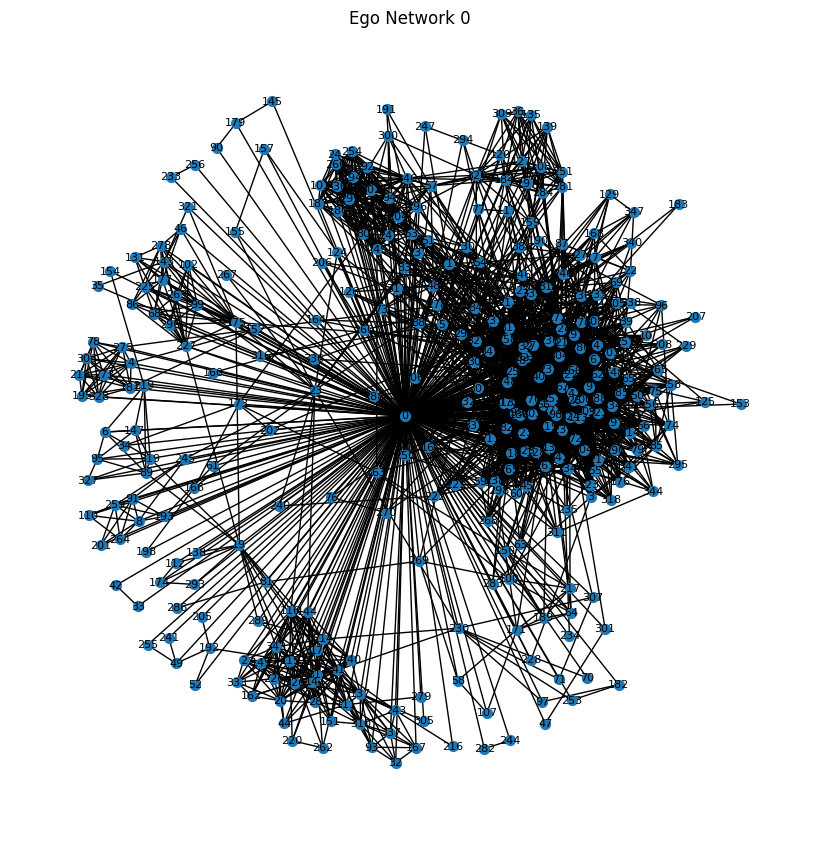

Ego Network 107 Statistics and centrality metrics:
Number of nodes: 1035
Number of edges: 27783
Density: 0.0519

Node-level metrics:

Top 5 nodes per metric:
  Degree centrality_nodes  Degree centrality_values  \
0                     107                  1.000000   
1                    1888                  0.245648   
2                    1800                  0.236944   
3                    1663                  0.227273   
4                    1352                  0.226306   

  Closeness centrality_nodes  Closeness centrality_values  \
0                        107                     1.000000   
1                       1888                     0.570011   
2                       1800                     0.567197   
3                       1663                     0.564103   
4                       1352                     0.563795   

  Betweenness centrality_nodes  Betweenness centrality_values  \
0                          107                       0.769511   
1             

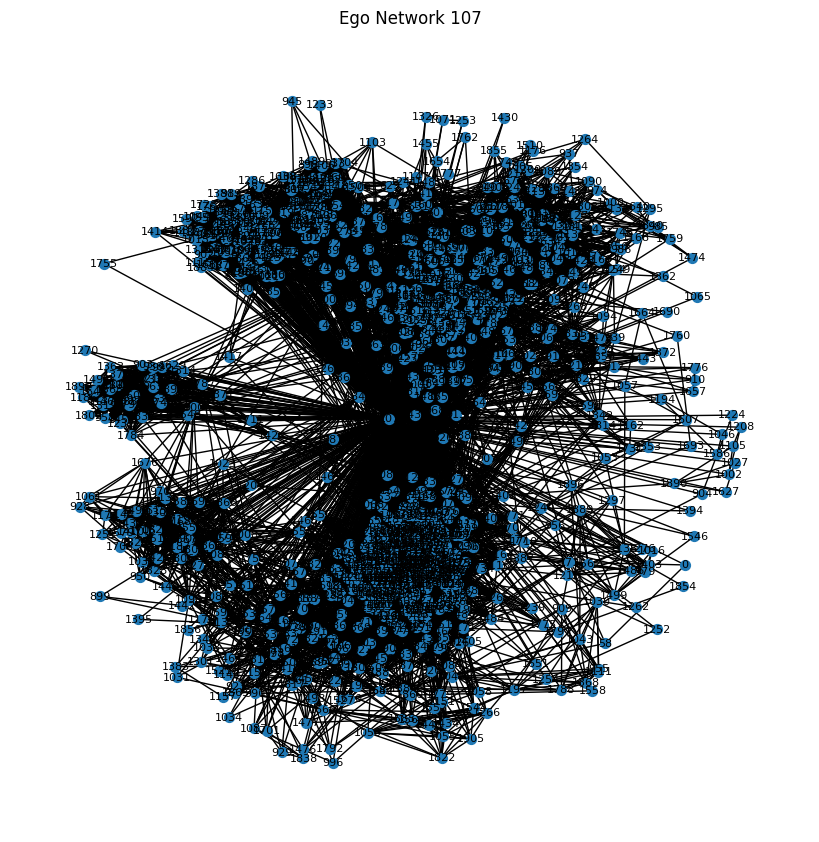

Ego Network 348 Statistics and centrality metrics:
Number of nodes: 225
Number of edges: 3416
Density: 0.1356

Node-level metrics:

Top 5 nodes per metric:
  Degree centrality_nodes  Degree centrality_values  \
0                     348                  1.000000   
1                     376                  0.446429   
2                     475                  0.401786   
3                     412                  0.397321   
4                     497                  0.370536   

  Closeness centrality_nodes  Closeness centrality_values  \
0                        348                     1.000000   
1                        376                     0.643678   
2                        475                     0.625698   
3                        412                     0.623955   
4                        497                     0.613699   

  Betweenness centrality_nodes  Betweenness centrality_values  \
0                          348                       0.527301   
1               

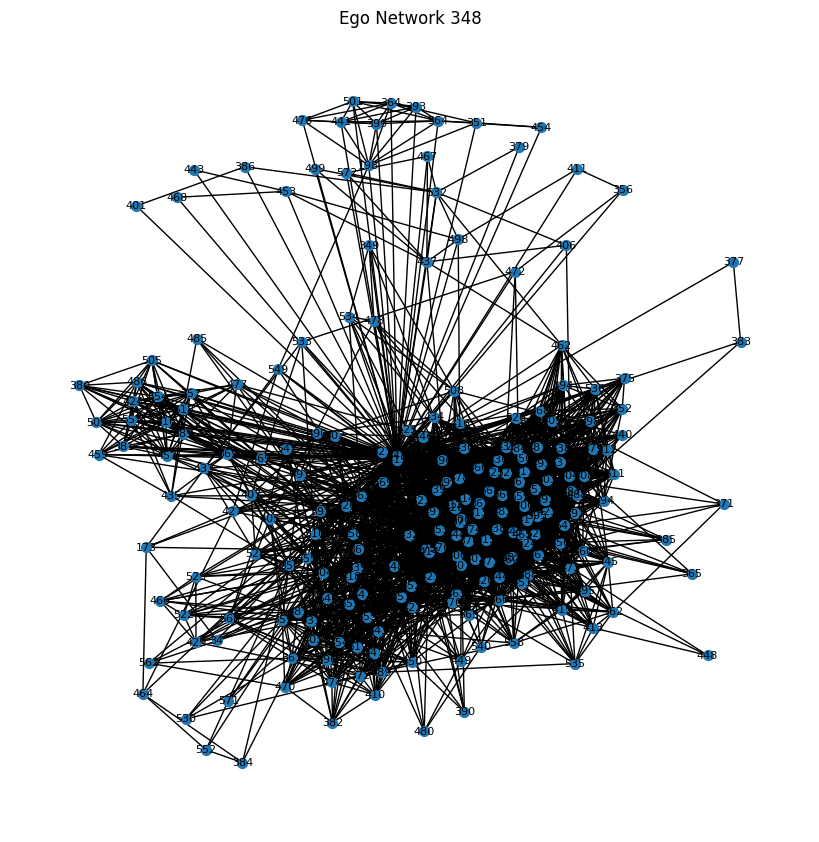

Ego Network 414 Statistics and centrality metrics:
Number of nodes: 151
Number of edges: 1843
Density: 0.1627

Node-level metrics:

Top 5 nodes per metric:
  Degree centrality_nodes  Degree centrality_values  \
0                     414                  1.000000   
1                     376                  0.386667   
2                     373                  0.360000   
3                     513                  0.333333   
4                     428                  0.326667   

  Closeness centrality_nodes  Closeness centrality_values  \
0                        414                     1.000000   
1                        376                     0.619835   
2                        373                     0.609756   
3                        513                     0.600000   
4                        428                     0.597610   

  Betweenness centrality_nodes  Betweenness centrality_values  \
0                          414                       0.634803   
1               

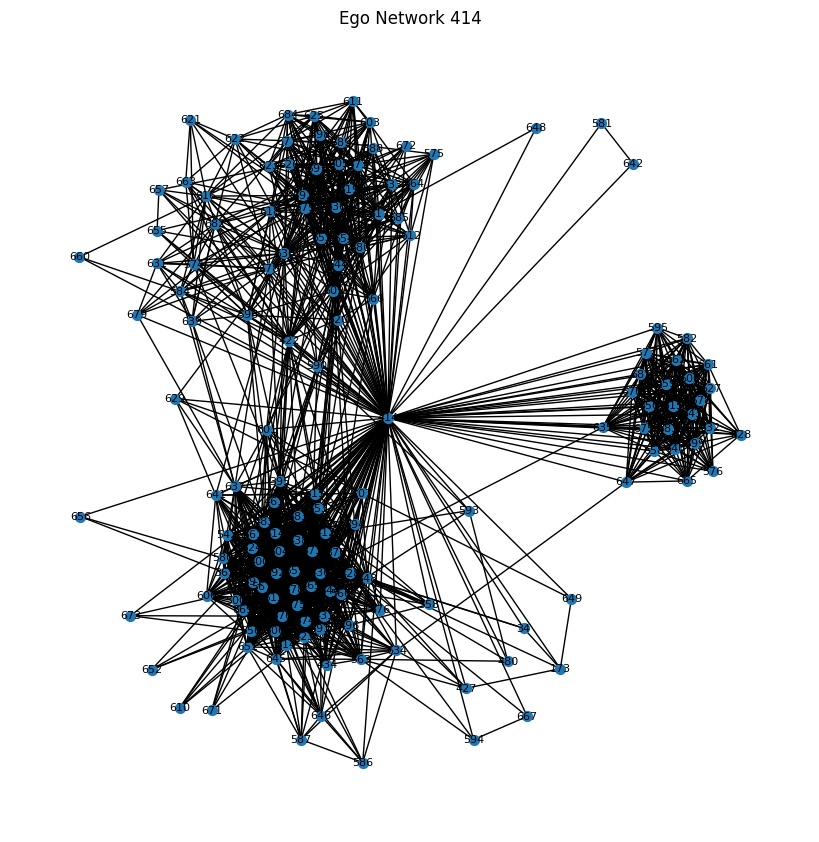

Ego Network 686 Statistics and centrality metrics:
Number of nodes: 169
Number of edges: 1824
Density: 0.1285

Node-level metrics:

Top 5 nodes per metric:
  Degree centrality_nodes  Degree centrality_values  \
0                     686                  1.000000   
1                     828                  0.464286   
2                     713                  0.422619   
3                     705                  0.410714   
4                     719                  0.380952   

  Closeness centrality_nodes  Closeness centrality_values  \
0                        686                     1.000000   
1                        828                     0.651163   
2                        713                     0.633962   
3                        705                     0.629213   
4                        719                     0.617647   

  Betweenness centrality_nodes  Betweenness centrality_values  \
0                          686                       0.549477   
1               

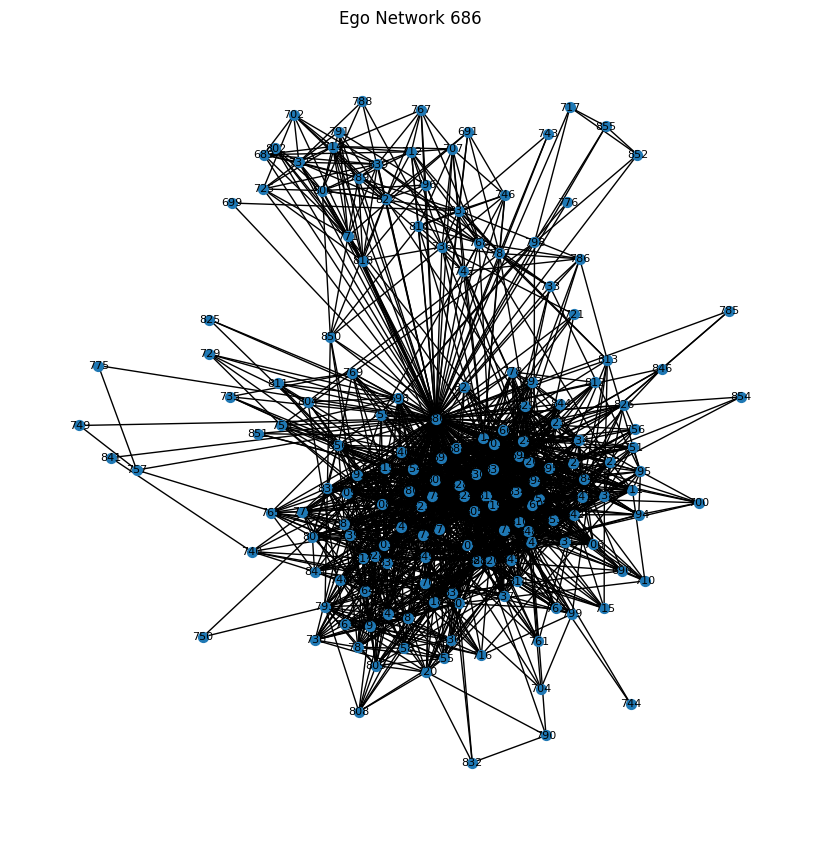

Ego Network 698 Statistics and centrality metrics:
Number of nodes: 62
Number of edges: 331
Density: 0.1750

Node-level metrics:

Top 5 nodes per metric:
  Degree centrality_nodes  Degree centrality_values  \
0                     698                  1.000000   
1                     856                  0.491803   
2                     747                  0.360656   
3                     828                  0.327869   
4                     823                  0.311475   

  Closeness centrality_nodes  Closeness centrality_values  \
0                        698                     1.000000   
1                        856                     0.663043   
2                        747                     0.610000   
3                        828                     0.598039   
4                        823                     0.592233   

  Betweenness centrality_nodes  Betweenness centrality_values  \
0                          698                       0.708871   
1                 

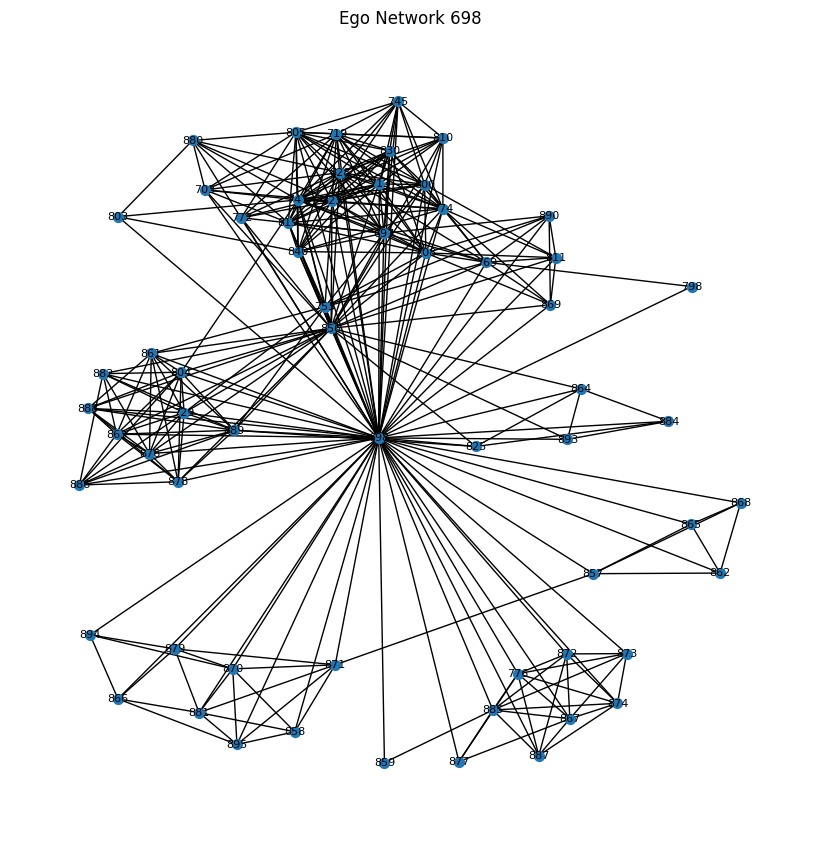

KeyboardInterrupt: 

In [15]:
# Folder containing Facebook ego networks:
dataset_path = 'facebook_data/facebook'
# List of ego node IDs (from the file names):
ego_node_ids = ['0', '107', '348', '414', '686', '698', '1684', '1912', '3437', '3980']
# Function to load one ego network:
def load_ego_network(node_id):
    # we get the edges file for the corresponding ego network
    edge_file = os.path.join(dataset_path, f"{node_id}.edges")
    G = nx.Graph()
    # we read the edges file and add edges to the graph
    with open(edge_file, 'r') as f:
        for line in f:
            edge = line.strip().split()
            G.add_edge(edge[0], edge[1])
    neighbors = set(G.nodes())
    G.add_node(node_id) # we add the ego node to the graph
    for neighbor in neighbors: # we assume all nodes in the edges file are direct neighbors of the ego node
        G.add_edge(node_id, neighbor) # we connect the ego node to its neighbors
    return G


def analyze_network(G, ego_id):
    # Calculate centrality metrics:
    degree_centrality = nx.degree_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    clustering_coefficient = nx.clustering(G)

    # Print network summary
    print("="*70)
    print(f"Ego Network {ego_id} Statistics and centrality metrics:")
    print("="*70)
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"Density: {nx.density(G):.4f}\n")
    # print(f"Graph degree centrality: {degree_centrality}")
    # print(f"Graph closeness centrality: {closeness_centrality}")
    # print(f"Graph betweenness centrality: {betweenness_centrality}")
    # print(f"Graph clustering coefficient: {clustering_coefficient}")
    
    # Create a DataFrame to summarize metrics of each node
    df_graph_metrics = pd.DataFrame({
        # 'Number of nodes': G.number_of_nodes(),
        # 'Number of edges': G.number_of_edges(),
        # 'Density': nx.density(G):.4f,
        'Node': list(G.nodes()),
        'Degree centrality': [degree_centrality[n] for n in G.nodes()],
        'Closeness centrality': [closeness_centrality[n] for n in G.nodes()],
        'Betweenness centrality': [betweenness_centrality[n] for n in G.nodes()],
        'Clustering coefficient': [clustering_coefficient[n] for n in G.nodes()]
    })
    df_graph_metrics = df_graph_metrics.set_index('Node')
    print("="*70)
    print("Node-level metrics:")
    print("="*70)
    # print(df_graph_metrics.head(20))
    # Extract top 5 nodes and corresponding values for each metric
    top_nodes = {}
    for metric in df_graph_metrics.columns:
        top = df_graph_metrics[metric].nlargest(5)
        top_nodes[metric] = top
    print("\nTop 5 nodes per metric:")
    # Create a summary table where each metric has two columns: top node IDs and their values
    summary_df = pd.DataFrame()

    for metric, top in top_nodes.items():
        # Column with top node IDs
        summary_df[f"{metric}_nodes"] = pd.Series(top.index).reset_index(drop=True)
        # Column with the corresponding top values
        summary_df[f"{metric}_values"] = pd.Series(top.values).reset_index(drop=True)

    print(summary_df)
    
    # # Centrality distribution plots
    # centralities_df = pd.DataFrame({
    #     'degree': list(degree_centrality.values()),
    #     'closeness': list(closeness_centrality.values()),
    #     'betweenness': list(betweenness_centrality.values())
    # })
    
    # plt.figure(figsize=(12, 4))
    # for i, metric in enumerate(centralities_df.columns):
    #     plt.subplot(1, 3, i+1)
    #     sns.histplot(centralities_df[metric], bins=20, kde=True)
    #     plt.title(f"{metric.capitalize()} Centrality Distribution")
    # plt.tight_layout()
    # plt.show()

def plot_network(G, ego_id):
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=50, font_size=8)
    plt.title(f"Ego Network {ego_id}")
    plt.show()

# Load all ego networks and visualize them:
for ego_id in ego_node_ids:
    G = load_ego_network(ego_id)
    analyze_network(G, ego_id)
    plot_network(G, ego_id)


### Statistics and centrality measures

### Community detection